In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

Linear Regression model based on above model 

In [2]:
regr = linear_model.LinearRegression()
Y = music['loudness'].values.reshape(-1, 1)
X = music[['duration', 'bpm']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-0.01512554 -0.41310123]]

Intercept: 
 [62.1762007]

R-squared:
0.31494345659427203


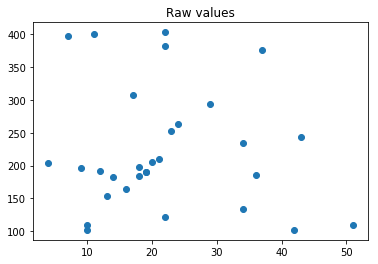

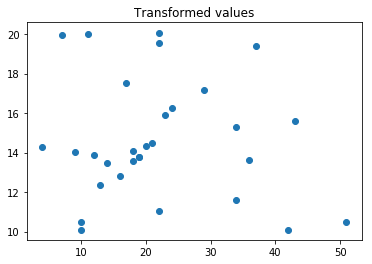

In [11]:
# Sample music data.
outcome = music['loudness']
feature = music['duration']

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

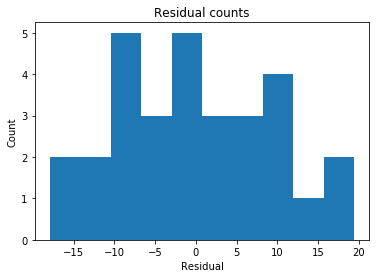

In [12]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = music['loudness']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

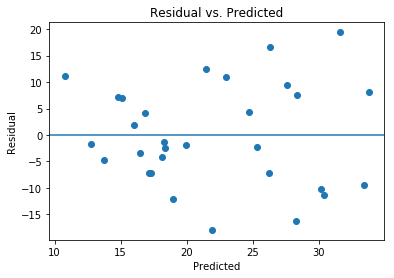

In [13]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [14]:

correlation_matrix = X.corr()
display(correlation_matrix)

,duration,bpm
duration,1.000000,-0.033007
bpm,-0.033007,1.000000


KNN Regression Model 

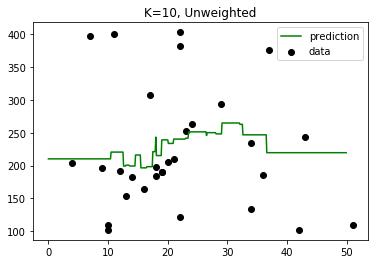

In [15]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.duration
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

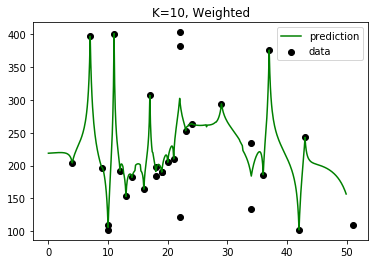

In [18]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X1 = pd.DataFrame(music.loudness)
Y1 = music.duration
knn_w.fit(X1, Y1)

# Set up our prediction line.
T1 = np.arange(0, 50, 0.1)[:, np.newaxis]

Y1_ = knn_w.predict(T)

plt.scatter(X1, Y1, c='k', label='data')
plt.plot(T1, Y1_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X1, Y1, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.90 (+/- 3.08)
Weighted Accuracy: -2.03 (+/- 7.32)


In this particular circumstance I would choose the KNN regression model as the prediction of the loadness to duration seems to fall more inline with the outcome. With a few outliers that are not significant in the model. This you can see more evident in the weighted plot. The Linear regression method has a lot more outliers in the residual to prediction model. In the linear regression there is a 30% match in the rsquared validation which with another feature choice may change. The histogram in the linear regression model is pretty clean so I would say that the numbers should be pretty accurate which means that the predicting in the OLS model is probably not the best fit.    